# Testing of the `switch` Extended GEKKO Functionality #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO
from aquaponics.gekko_extensions import register_extensions

## One Switch ##

In [2]:
m = register_extensions(GEKKO())

tf = 1
steps = tf * 100 + 1
m.time = np.linspace(0,tf,steps)

x = m.Var(value=0)
xright = m.Var(value=1)
y = m.Var(value=0)
sig = m.Var(value=0)
k = 100

m.Equation(x.dt() == 1)
m.Equation(xright == 1 - x)
m.Equation(y == m.switch(x, xright, x, .5, k=k))
m.Equation(sig == 1 / (1 + m.exp(-k * (x - 0.5))))

m.options.IMODE = 4
m.solve(disp=False)

Text(0.5,0,'Time')

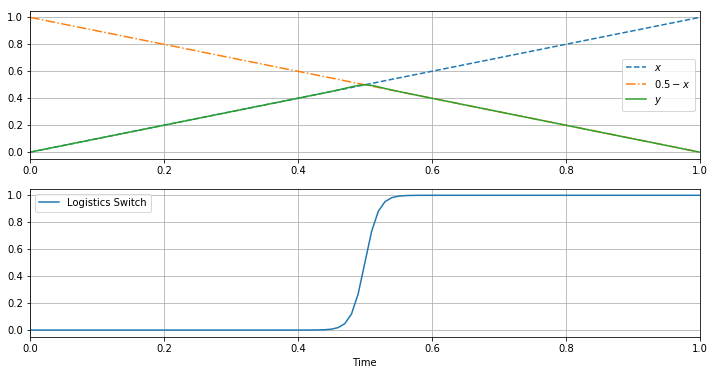

In [3]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, x, label='$x$', linestyle='--')
plt.plot(m.time, xright, label='$0.5 - x$', linestyle='-.')
plt.plot(m.time, y, label='$y$')

plt.legend()
plt.grid()

plt.subplot(212, sharex=ax)
plt.plot(m.time, sig, label='Logistics Switch')
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time')

## Two Switches ##

In [6]:
m = register_extensions(GEKKO())

tf = 2
steps = tf * 100 + 1
m.time = np.linspace(0,tf,steps)

x = m.Var(value=0.2)
y = m.Var(value=0.3)
k = 100

m.Equation(x.dt() == x)
yup = m.Intermediate(m.switch(x, 0.7, x, .7))
m.Equation(y == m.switch(0.3, yup, yup, 0.3))

m.options.IMODE = 4
m.solve(disp=False)

Text(0.5,0,'Time')

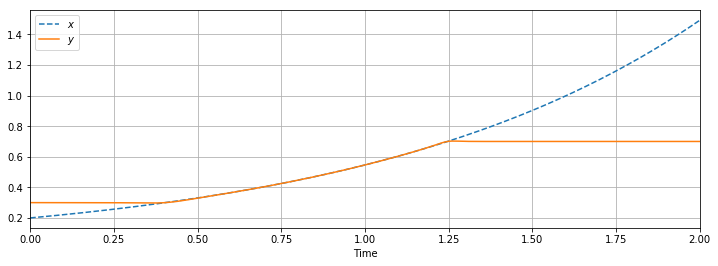

In [7]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.plot(m.time, x, label='$x$', linestyle='--')
plt.plot(m.time, y, label='$y$')

plt.legend()
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time')